In [56]:
import torch
import torchvision

# data loading and transforming
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

data_transform = transforms.ToTensor()

train_data = FashionMNIST(root='F_MNIST_data/', train=True,download=False,transform=data_transform)

print(len(train_data))

60000


In [57]:
batchsize = 20
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

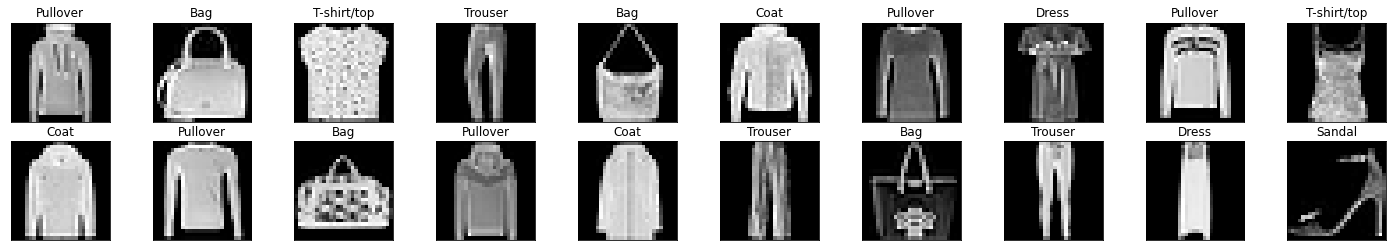

In [58]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
dataiter = iter(train_loader)
images,labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))

for idx in np.arange(batchsize):
    ax = fig.add_subplot(2, batchsize//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

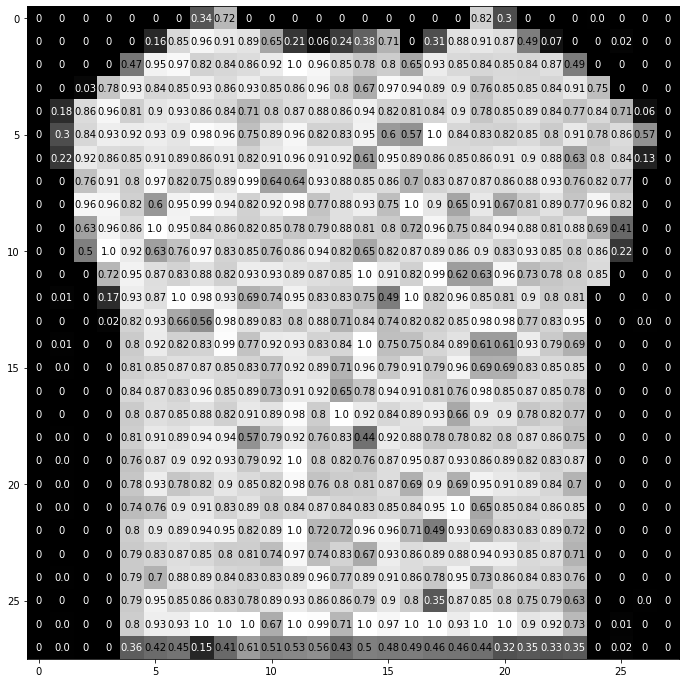

In [59]:
idx = 2
img = np.squeeze(images[idx])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val),xy =(y,x),
                    horizontalalignment='center',
                    verticalalignment ='center',
                    color = 'white' if img[x][y] < thresh else 'black')

In [60]:
img.max()

1.0

In [61]:
img.shape

(28, 28)

In [62]:
test_data = FashionMNIST(root='F_MNIST_data/', train=False,download=False,transform=data_transform)

print(len(test_data))

10000


In [63]:
test_loader = DataLoader(test_data, batch_size=batchsize, shuffle=True)

### Define the network architecture

The various layers that make up any neural network are documented, [here](http://pytorch.org/docs/master/nn.html). For a convolutional neural network, we'll use a simple series of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected (linear) layers

You are also encouraged to look at adding [dropout layers](http://pytorch.org/docs/stable/nn.html#dropout) to avoid overfitting this data.

---

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

You must place any layers with trainable weights, such as convolutional layers, in the `__init__` function and refer to them in the `forward` functio; any layers or functions that always behave in the same way, such as a pre-defined activation function, may appear in either the `__init__` or the `forward` function. In practice, you'll often see conv/pool layers defined in `__init__` and activations defined in `forward`.

#### Convolutional layer
The first convolution layer has been defined for you, it takes in a 1 channel (grayscale) image and outputs 10 feature maps as output, after convolving the image with 3x3 filters.

#### Flattening

Recall that to move from the output of a convoluttional/pooling layer to a linear layer, you must first flatten your extracted features into a vector. If you've used the deep learning library, Keras, you may have seen this done by `Flatten()`, and in PyTorch you can flatten an input `x` with `x = x.view(x.size(0), -1)`.

### TODO: Define the rest of the layers

It will be up to you to define the other layers in this network; we have some recommendations, but you may change the architecture and parameters as you see fit.

Recommendations/tips:
* Use at least two convolutional layers
* Your output must be a linear layer with 10 outputs (for the 10 classes of clothing)
* Use a dropout layer to avoid overfitting

In [64]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # 1 input image channel (grayscale), 10 output channels/feature maps
        # 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 10, 3)

        ## TODO: Define the rest of the layers:
        # include another conv layer, maxpooling layers, and linear layers
        # also consider adding a dropout layer to avoid overfitting

        self.conv2 = nn.Conv2d(10, 20, 3)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(500, 100)
        self.fc2 = nn.Linear(100, 10)

        self.dropout = nn.Dropout(0.25)


    ## TODO: define the feedforward behavior
    def forward(self, x):
        # one activated conv layer
        x = self.pool(F.relu(self.conv1(x)))

        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x =self.fc2(x)

        # final output
        return x

# instantiate and print your Net
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=500, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [65]:
import torch.optim as optim

## TODO: specify loss function (try categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

## TODO: specify optimizer
optimizer = optim.SGD(net.parameters(),lr=0.01)

### A note on accuracy

It's interesting to look at the accuracy of your network **before and after** training. This way you can really see that your network has learned something. In the next cell, let's see what the accuracy of an untrained network is (we expect it to be around 10% which is the same accuracy as just guessing for all 10 classes).

#### Variable

Before an input tensor can be processed by a model, it must be wrapped in a Variable wrapper; this wrapper gives PyTorch the ability to automatically track how this input changes as it passes through the network and automatically calculate the gradients needed for backpropagation.

In [66]:
from torch.autograd import Variable

# Calculate accuracy before training
correct = 0
total = 0

# Iterate through test dataset
for images, labels in test_loader:

    # warp input images in a Variable wrapper
    images = Variable(images)

    # forward pass to get outputs
    # the outputs are a series of class scores
    outputs = net(images)

    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)

    # count up total number of correct labels
    # for which the predicted and true labels are equal
    total += labels.size(0)
    correct += (predicted == labels).sum()

# calculate the accuracy
accuracy = 100 * correct / total

# print it out!
print('Accuracy before training: ', accuracy)

Accuracy before training:  tensor(9.1700)


In [67]:
img.shape

(28, 28)

### Train the Network

Below, we've defined a `train` function that takes in a number of epochs to train for. The number of epochs is how many times a network will cycle through the training dataset.

Here are the steps that this training function performs as it iterates over the training dataset:

1. Wraps all tensors in Variables
2. Zero's the gradients to prepare for a forward pass
3. Passes the input through the network (forward pass)
4. Computes the loss (how far is the predicted classes are from the correct labels)
5. Propagates gradients back into the network’s parameters (backward pass)
6. Updates the weights (parameter update)
7. Prints out the calculated loss


In [68]:
def train(n_epochs):

    for epoch in range(n_epochs):

        running_loss = 0.0
        for batch_i, data in enumerate(train_loader):

            inputs, labels = data

            inputs, labels = Variable(inputs), Variable(labels)

            optimizer.zero_grad()

            outputs = net(inputs)

            loss = criterion(outputs,labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.data.item()
            if batch_i % 1000 == 999:    # print every 1000 mini-batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))
                running_loss = 0.0

    print('Finished Training')

In [69]:
# define the number of epochs to train for
n_epochs = 5 # start small to see if your model works, initially

# call train
train(n_epochs)

Epoch: 1, Batch: 1000, Avg. Loss: 1.6434378634393214
Epoch: 1, Batch: 2000, Avg. Loss: 0.8119456878304482
Epoch: 1, Batch: 3000, Avg. Loss: 0.7075414716899395
Epoch: 2, Batch: 1000, Avg. Loss: 0.6526259099543095
Epoch: 2, Batch: 2000, Avg. Loss: 0.5881479101032019
Epoch: 2, Batch: 3000, Avg. Loss: 0.5744851806014776
Epoch: 3, Batch: 1000, Avg. Loss: 0.5424101000279188
Epoch: 3, Batch: 2000, Avg. Loss: 0.5140068555176258
Epoch: 3, Batch: 3000, Avg. Loss: 0.49542097552865744
Epoch: 4, Batch: 1000, Avg. Loss: 0.47989464341849086
Epoch: 4, Batch: 2000, Avg. Loss: 0.46760091461613773
Epoch: 4, Batch: 3000, Avg. Loss: 0.45306038292497397
Epoch: 5, Batch: 1000, Avg. Loss: 0.4423840246424079
Epoch: 5, Batch: 2000, Avg. Loss: 0.43522366932034495
Epoch: 5, Batch: 3000, Avg. Loss: 0.42235826958715916
Finished Training


### Test the Trained Network

Once you are satisfied with how the loss of your model has decreased, there is one last step: test!

You must test your trained model on a previously unseen dataset to see if it generalizes well and can accurately classify this new dataset. For FashionMNIST, which contains many pre-processed training images, a good model should reach **greater than 85% accuracy** on this test dataset. If you are not reaching this value, try training for a larger number of epochs, tweaking your hyperparameters, or adding/subtracting layers from your CNN.

In [70]:
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

net.eval()

for batch_i, data in enumerate(test_loader):

    inputs, labels = data

    # wrap them in a torch Variable
    # volatile means we do not have to track how the inputs change
    with torch.no_grad():
        inputs, labels = Variable(inputs), Variable(labels)

    outputs = net(inputs)
    loss = criterion(outputs,labels)

    test_loss = test_loss + ((torch.ones(1)/(batch_i + 1)) * (loss.data - test_loss))

    _, predicted = torch.max(outputs.data,1)

    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))

    for i in range(batchsize):

        label = labels.data[i]
        class_correct[label] += correct[i].item() # scalar accuracy
        class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))


print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.233364

Test Loss: 0.212250

Test Loss: 0.266512

Test Loss: 0.268012

Test Loss: 0.299807

Test Loss: 0.334979

Test Loss: 0.300471

Test Loss: 0.310118

Test Loss: 0.290063

Test Loss: 0.270986

Test Loss: 0.278701

Test Loss: 0.319274

Test Loss: 0.308158

Test Loss: 0.315850

Test Loss: 0.330495

Test Loss: 0.343267

Test Loss: 0.394374

Test Loss: 0.410510

Test Loss: 0.420167

Test Loss: 0.422772

Test Loss: 0.421567

Test Loss: 0.418340

Test Loss: 0.423923

Test Loss: 0.421665

Test Loss: 0.420013

Test Loss: 0.424431

Test Loss: 0.431772

Test Loss: 0.426559

Test Loss: 0.416496

Test Loss: 0.411683

Test Loss: 0.415535

Test Loss: 0.412866

Test Loss: 0.425103

Test Loss: 0.425044

Test Loss: 0.426581

Test Loss: 0.424686

Test Loss: 0.419276

Test Loss: 0.421530

Test Loss: 0.426480

Test Loss: 0.421879

Test Loss: 0.424509

Test Loss: 0.422121

Test Loss: 0.414834

Test Loss: 0.417371

Test Loss: 0.418517

Test Loss: 0.416437

Test Loss: 0.414214

Test Loss: 0.

C:\Users\Andrei\AppData\Local\Temp\ipykernel_13840\3435083390.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  preds = np.squeeze(net(Variable(images, volatile=True)).data.max(1, keepdim=True)[1].numpy())


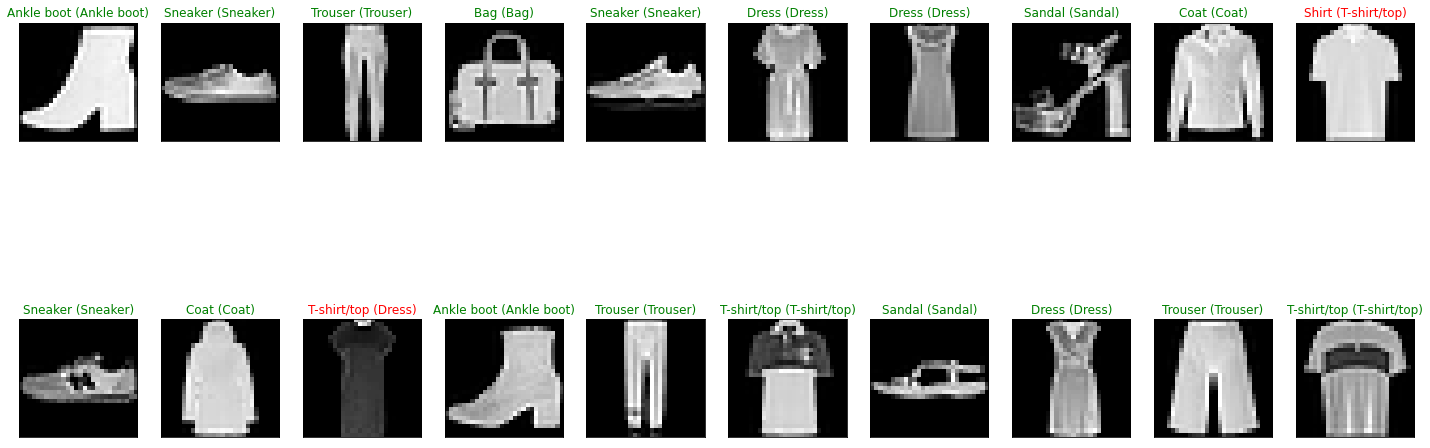

In [71]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(net(Variable(images, volatile=True)).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 10))
for idx in np.arange(batchsize):
    ax = fig.add_subplot(2, batchsize//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [72]:
## TODO: change the model_name to something uniqe for any new model
## you wish to save, this will save it in the saved_models directory
model_dir = 'saved_models/'
model_name = 'model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
# when you're ready, un-comment the line below
torch.save(net.state_dict(), model_dir+model_name)

In [73]:
# instantiate your Net
# this refers to your Net class defined above
net = Net()

# load the net parameters by name
# uncomment and write the name of a saved model
net.load_state_dict(torch.load('saved_models/model_1.pt'))

print(net)

# Once you've loaded a specific model in, you can then
# us it or further analyze it!
# This will be especialy useful for feature visualization

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=500, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


### Solution 1

In [74]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # 1 input image channel (grayscale), 10 output channels/feature maps
        # 3x3 square convolution kernel
        ## output size = (W-F)/S +1 = (28-3)/1 +1 = 26
        # the output Tensor for one image, will have the dimensions: (10, 26, 26)
        # after one pool layer, this becomes (10, 13, 13)
        self.conv1 = nn.Conv2d(1, 10, 3)

        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool = nn.MaxPool2d(2, 2)

        # second conv layer: 10 inputs, 20 outputs, 3x3 conv
        ## output size = (W-F)/S +1 = (13-3)/1 +1 = 11
        # the output tensor will have dimensions: (20, 11, 11)
        # after another pool layer this becomes (20, 5, 5); 5.5 is rounded down
        self.conv2 = nn.Conv2d(10, 20, 3)

        # 20 outputs * the 5*5 filtered/pooled map size
        # 10 output channels (for the 10 classes)
        self.fc1 = nn.Linear(20*5*5, 10)


    # define the feedforward behavior
    def forward(self, x):
        # two conv/relu + pool layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # prep for linear layer
        # flatten the inputs into a vector
        x = x.view(x.size(0), -1)

        # one linear layer
        x = F.relu(self.fc1(x))
        # a softmax layer to convert the 10 outputs into a distribution of class scores
        x = F.log_softmax(x, dim=1)

        # final output
        return x

# instantiate and print your Net
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=10, bias=True)
)


### Solution 2

In [88]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # 1 input image channel (grayscale), 10 output channels/feature maps
        # 3x3 square convolution kernel
        ## output size = (W-F)/S +1 = (28-3)/1 +1 = 26
        # the output Tensor for one image, will have the dimensions: (10, 26, 26)
        # after one pool layer, this becomes (10, 13, 13)
        self.conv1 = nn.Conv2d(1, 10, 5)

        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool = nn.MaxPool2d(2, 2)

        # second conv layer: 10 inputs, 20 outputs, 3x3 conv
        ## output size = (W-F)/S +1 = (13-3)/1 +1 = 11
        # the output tensor will have dimensions: (20, 11, 11)
        # after another pool layer this becomes (20, 5, 5); 5.5 is rounded down
        self.conv2 = nn.Conv2d(10, 30, 5)

        # 20 outputs * the 5*5 filtered/pooled map size
        self.fc1 = nn.Linear(30*4*4, 50)

        # dropout with p=0.4
        self.fc1_drop = nn.Dropout(p=0.4)

        # finally, create 10 output channels (for the 10 classes)
        self.fc2 = nn.Linear(50, 10)

    # define the feedforward behavior
    def forward(self, x):
        # two conv/relu + pool layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # prep for linear layer
        # this line of code is the equivalent of Flatten in Keras
        x = x.view(x.size(0), -1)

        # two linear layers with dropout in between
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = self.fc2(x)

        # final output
        return x

# instantiate and print your Net
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 30, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=480, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [89]:
import torch.optim as optim

## TODO: specify loss function
# cross entropy loss combines softmax and nn.NLLLoss() in one single class.
criterion = nn.NLLLoss()

## TODO: specify optimizer
# stochastic gradient descent with a small learning rate
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [90]:
import torch.optim as optim

## TODO: specify loss function
# using cross entropy which combines softmax and NLL loss
criterion = nn.CrossEntropyLoss()

## TODO: specify optimizer
# stochastic gradient descent with a small learning rate AND some momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [91]:
# Calculate accuracy before training
correct = 0
total = 0

# Iterate through test dataset
for images, labels in test_loader:

    # forward pass to get outputs
    # the outputs are a series of class scores
    outputs = net(images)

    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)

    # count up total number of correct labels
    # for which the predicted and true labels are equal
    total += labels.size(0)
    correct += (predicted == labels).sum()

# calculate the accuracy
# to convert `correct` from a Tensor into a scalar, use .item()
accuracy = 100.0 * correct.item() / total

# print it out!
print('Accuracy before training: ', accuracy)

Accuracy before training:  11.5


In [92]:
def train(n_epochs):

    loss_over_time = [] # to track the loss as the network trains

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0

        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            inputs, labels = data

            # zero the parameter (weight) gradients
            optimizer.zero_grad()

            # forward pass to get outputs
            outputs = net(inputs)

            # calculate the loss
            loss = criterion(outputs, labels)

            # backward pass to calculate the parameter gradients
            loss.backward()

            # update the parameters
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to running_loss, we use .item()
            running_loss += loss.item()

            if batch_i % 1000 == 999:    # print every 1000 batches
                avg_loss = running_loss/1000
                # record and print the avg loss over the 1000 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, avg_loss))
                running_loss = 0.0

    print('Finished Training')
    return loss_over_time

In [93]:
# define the number of epochs to train for
n_epochs = 30 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1, Batch: 1000, Avg. Loss: 1.6733044112324715
Epoch: 1, Batch: 2000, Avg. Loss: 0.9474953350126744
Epoch: 1, Batch: 3000, Avg. Loss: 0.790877612605691
Epoch: 2, Batch: 1000, Avg. Loss: 0.7452817412912845
Epoch: 2, Batch: 2000, Avg. Loss: 0.6985326615720987
Epoch: 2, Batch: 3000, Avg. Loss: 0.6479124588817358
Epoch: 3, Batch: 1000, Avg. Loss: 0.6337282006442547
Epoch: 3, Batch: 2000, Avg. Loss: 0.6097562168538571
Epoch: 3, Batch: 3000, Avg. Loss: 0.591390816628933
Epoch: 4, Batch: 1000, Avg. Loss: 0.5720237017869949
Epoch: 4, Batch: 2000, Avg. Loss: 0.557650282457471
Epoch: 4, Batch: 3000, Avg. Loss: 0.5459967766702175
Epoch: 5, Batch: 1000, Avg. Loss: 0.5280456862449646
Epoch: 5, Batch: 2000, Avg. Loss: 0.5243440500870347
Epoch: 5, Batch: 3000, Avg. Loss: 0.5259602013081313
Epoch: 6, Batch: 1000, Avg. Loss: 0.5057208670675755
Epoch: 6, Batch: 2000, Avg. Loss: 0.509361214183271
Epoch: 6, Batch: 3000, Avg. Loss: 0.49933587784320116
Epoch: 7, Batch: 1000, Avg. Loss: 0.4816929170638

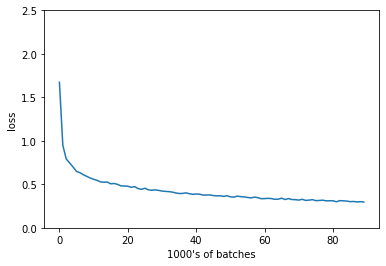

In [94]:
# visualize the loss as the network trained
plt.plot(training_loss)
plt.xlabel('1000\'s of batches')
plt.ylabel('loss')
plt.ylim(0, 2.5) # consistent scale
plt.show()

In [95]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(test_loader):

    # get the input images and their corresponding labels
    inputs, labels = data

    # forward pass to get outputs
    outputs = net(inputs)

    # calculate the loss
    loss = criterion(outputs, labels)

    # update average test loss
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))

    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)

    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))

    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(batchsize):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))


print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.301770

Test Accuracy of T-shirt/top: 91% (914/1000)
Test Accuracy of Trouser: 97% (970/1000)
Test Accuracy of Pullover: 88% (887/1000)
Test Accuracy of Dress: 91% (910/1000)
Test Accuracy of  Coat: 74% (745/1000)
Test Accuracy of Sandal: 96% (965/1000)
Test Accuracy of Shirt: 60% (604/1000)
Test Accuracy of Sneaker: 95% (951/1000)
Test Accuracy of   Bag: 98% (985/1000)
Test Accuracy of Ankle boot: 96% (961/1000)

Test Accuracy (Overall): 88% (8892/10000)


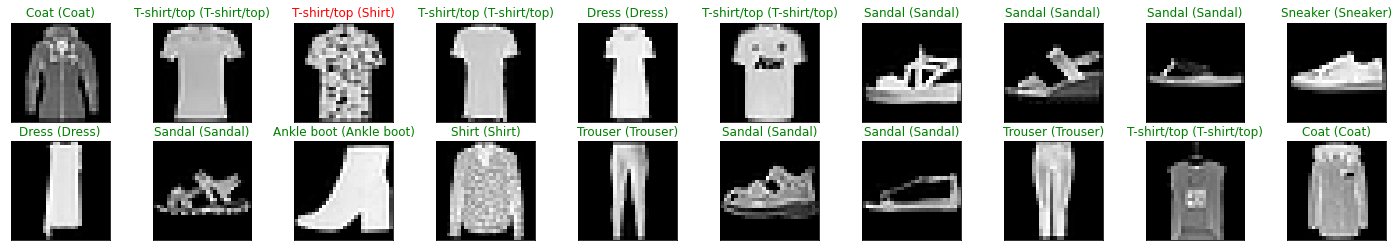

In [96]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(net(images).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batchsize):
    ax = fig.add_subplot(2, batchsize//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [97]:
## TODO: change the model_name to something uniqe for any new model
## you wish to save, this will save it in the saved_models directory
model_dir = 'saved_models/'
model_name = 'model_advanced.pt'

# after training, save your model parameters in the dir 'saved_models'
# when you're ready, un-comment the line below
torch.save(net.state_dict(), model_dir+model_name)

In [98]:
# instantiate your Net
net = Net()

# load the net parameters by name
net.load_state_dict(torch.load('saved_models/model_advanced.pt'))

print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 30, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=480, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. These techniques are called feature visualization and they are useful for understanding the inner workings of a CNN.

In the cell below, you'll see how to extract and visualize the filter weights for all of the filters in the first convolutional layer.

Note the patterns of light and dark pixels and see if you can tell what a particular filter is detecting. For example, the filter pictured in the example below has dark pixels on either side and light pixels in the middle column, and so it may be detecting vertical edges.

<img src='edge_filter_ex.png' width= 30% height=30%/>



First convolutional layer


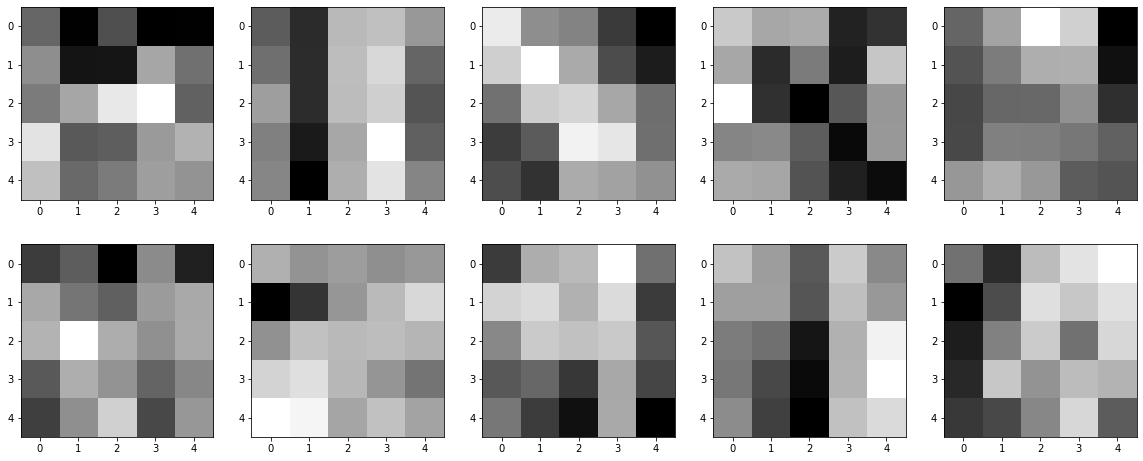

In [109]:
weights = net.conv1.weight.data
w = weights.numpy()

fig = plt.figure(figsize=(20,8))
columns = 5
rows = 2

for i in range(0, columns*rows):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(w[i][0],cmap='gray')

print('First convolutional layer')
plt.show()

weights = net.conv2.weight.data
w = weights.numpy()

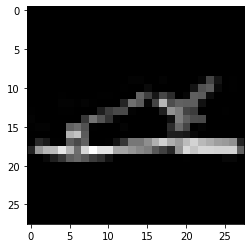

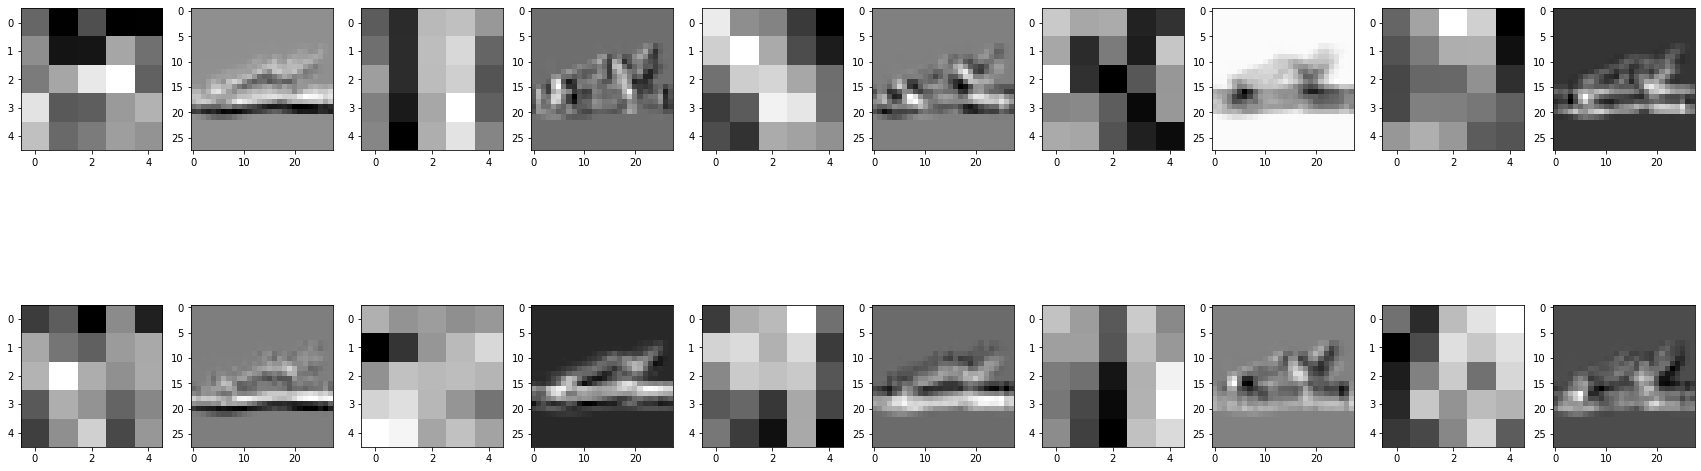

In [114]:
dataiter = iter(test_loader)

images,labels = dataiter.next()
images = images.numpy()

idx = 3
img = np.squeeze(images[idx])

import cv2
plt.imshow(img, cmap='gray')

weights = net.conv1.weight.data
w = weights.numpy()

fig=plt.figure(figsize=(30, 10))
columns = 5*2
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if ((i%2)==0):
        plt.imshow(w[int(i/2)][0], cmap='gray')
    else:
        c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
        plt.imshow(c, cmap='gray')
plt.show()

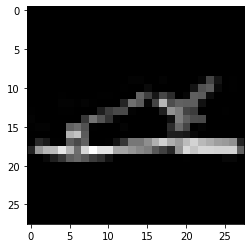

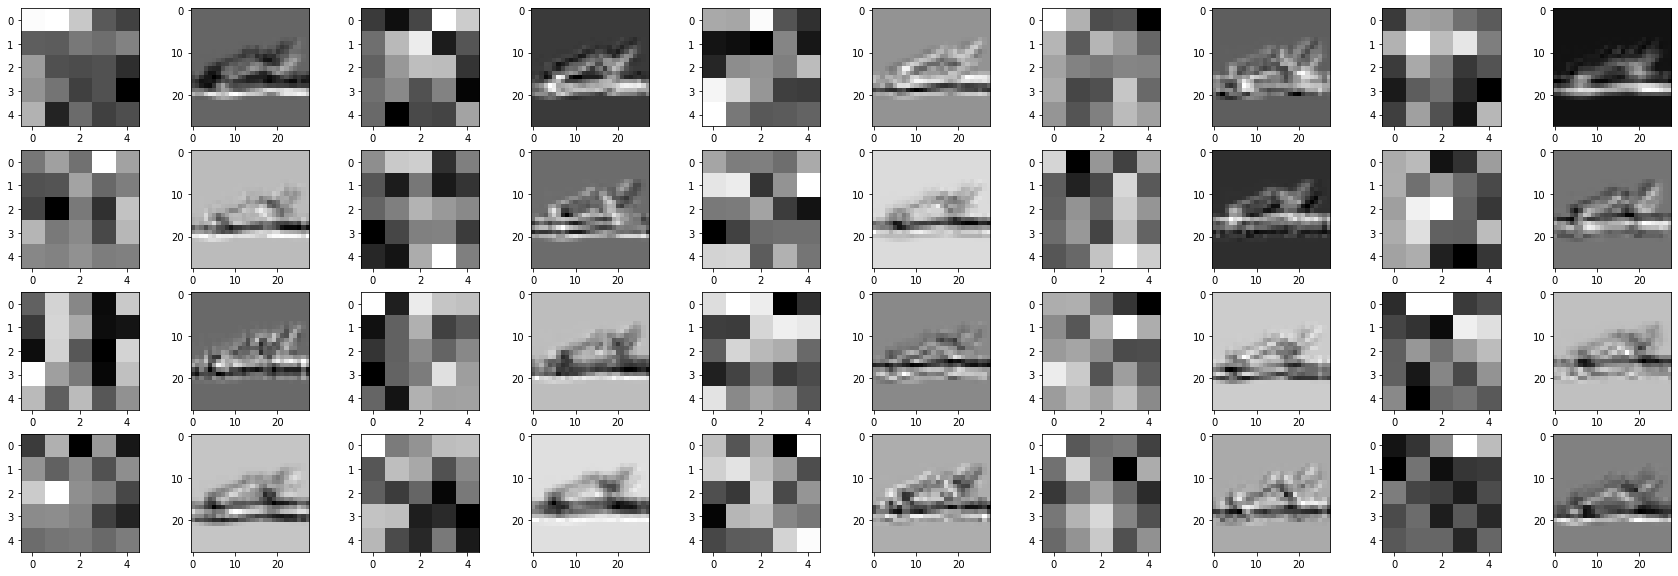

In [115]:
# Same process but for the second conv layer (20, 3x3 filters):
plt.imshow(img, cmap='gray')

# second conv layer, conv2
weights = net.conv2.weight.data
w = weights.numpy()

# 1. first conv layer
# for 20 filters
fig=plt.figure(figsize=(30, 10))
columns = 5*2
rows = 2*2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if ((i%2)==0):
        plt.imshow(w[int(i/2)][0], cmap='gray')
    else:
        c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
        plt.imshow(c, cmap='gray')
plt.show()